# Data integration

<!--
navody na pouzivanie pandas, matplotlib a numpy na spracovanie dat. Niesu to informacie o tom ako robit explorativnu analyzu, ale ako pouzivat kniznice

Z tohoto povyberam zaujimave casti, spojim ich s nejakou kapitolou v knihe o tom ako riesit spracovanie, cistanie dat a transformovanie dat
http://nbviewer.jupyter.org/github/ResearchComputing/Meetup-Fall-2013/blob/master/python/lecture_10_pandas_introduction.ipynb
http://nbviewer.jupyter.org/github/ResearchComputing/Meetup-Fall-2013/blob/master/python/lecture_11_pandas_adding_data.ipynb
http://nbviewer.jupyter.org/github/ResearchComputing/Meetup-Fall-2013/blob/master/python/lecture_12_pandas_groupby.ipynb
http://nbviewer.jupyter.org/github/ResearchComputing/Meetup-Fall-2013/blob/master/python/lecture_13_pandas_movies.ipynb 
http://nbviewer.jupyter.org/github/ResearchComputing/Meetup-Fall-2013/blob/master/python/lecture_14_pandas_reshape.ipynb
http://nbviewer.jupyter.org/github/ResearchComputing/Meetup-Fall-2013/blob/master/python/lecture_15_pandas_transforming.ipynb
http://nbviewer.jupyter.org/github/ResearchComputing/Meetup-Fall-2013/blob/master/python/lecture_21_pandas_processing.ipynb
http://nbviewer.jupyter.org/github/ResearchComputing/Meetup-Fall-2013/blob/master/python/lecture_22_pandas_cleaning.ipynb

http://nbviewer.jupyter.org/github/ResearchComputing/Meetup-Fall-2013/blob/master/python/lecture_23_titanic_example.ipynb
-->

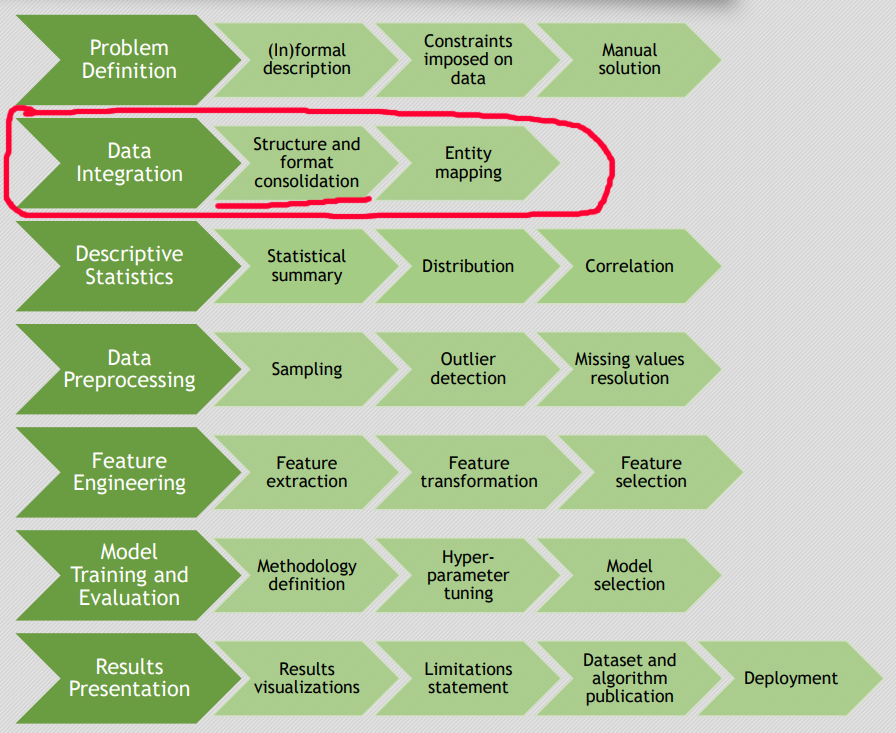

In [1]:
from IPython.display import Image
Image('ML_Workflow.PNG')

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## We will try to play with some data

In [3]:
data = pd.read_csv("data/BETR8010000800100hour.1-1-1990.31-12-2012")
data.head()

,1990-01-01 -999.000 0 -999.000 0 -999.000 0 -999.000 0 -999.000 0 -999.000 0 -999.000 0 -999.000 0 -999.000 0 -999.000 0 -999.000 0 -999.000 0 -999.000 0 -999.000 0 -999.000 0 -999.000 0 -999.000 0 -999.000 0 -999.000 0 -999.000 0 -999.000 0 -999.000 0 -999.000 0 -999.000 0
0,1990-01-02\t-999.000\t0\t-999.000\t0\t-999.000...
1,1990-01-03\t51.000\t1\t50.000\t1\t47.000\t1\t4...
2,1990-01-04\t-999.000\t0\t-999.000\t0\t-999.000...
3,1990-01-05\t51.000\t1\t51.000\t1\t48.000\t1\t5...
4,1990-01-06\t-999.000\t0\t-999.000\t0\t-999.000...


We can see that when loading the data, several problem occured - all the data are in one column and the first line was used as header. We will try to look at the data in som editor (console would be enough) before loading them.


In [4]:
%%bash
head ../data/BETR8010000800100hour.1-1-1990.31-12-2012

head: cannot open '../data/BETR8010000800100hour.1-1-1990.31-12-2012' for reading: No such file or directory


From this, we can see that the data is probably in CSV format, the separator is \t, there are some numerical data and we have not ani column labels.

Maybe even before trying to load the data, I could have tryed to look a little bit on the file. I could have saved one call. And in the case of working with a very large file some further complications. 

In [5]:
%%bash
ls -lh ../data/BETR8010000800100hour.1-1-1990.31-12-2012

ls: cannot access '../data/BETR8010000800100hour.1-1-1990.31-12-2012': No such file or directory


In [6]:
%%bash 
wc -l ../data/BETR8010000800100hour.1-1-1990.31-12-2012

wc: ../data/BETR8010000800100hour.1-1-1990.31-12-2012: No such file or directory


There is no som much data, so I can try to load it all into memory.

In [7]:
data = pd.read_csv("data/BETR8010000800100hour.1-1-1990.31-12-2012", sep='\t', header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,1990-01-01,-999.0,0,-999.0,0,-999.0,0,-999.0,0,-999.0,...,-999.0,0,-999.0,0,-999.0,0,-999.0,0,-999.0,0
1,1990-01-02,-999.0,0,-999.0,0,-999.0,0,-999.0,0,-999.0,...,57.0,1,58.0,1,54.0,1,49.0,1,48.0,1
2,1990-01-03,51.0,1,50.0,1,47.0,1,48.0,1,51.0,...,84.0,1,75.0,1,-999.0,0,-999.0,0,-999.0,0
3,1990-01-04,-999.0,0,-999.0,0,-999.0,0,-999.0,0,-999.0,...,69.0,1,65.0,1,64.0,1,60.0,1,59.0,1
4,1990-01-05,51.0,1,51.0,1,48.0,1,50.0,1,51.0,...,-999.0,0,-999.0,0,-999.0,0,-999.0,0,-999.0,0


We have 49 columns. Date and 48 other numerical attributes. Every other seems to be binary. Probably some flag. 

Data is composed from measurements of some value, probably in hour intervals during the day.

One day per row. Every hour of a day has a column + column for some flag which is not interesting for us right now. 

There are some strange values, that shoul probably not be there: -999 a -9999

The date is probably index.

In [8]:
filename = "data/BETR8010000800100hour.1-1-1990.31-12-2012"

data = pd.read_csv(filename, sep='\t', header=None,
                   na_values=[-999, -9999], index_col=0)
# a lot of data transformation can be done when loading the data
data.head()

,1,2,3,4,5,6,7,8,9,10,...,39,40,41,42,43,44,45,46,47,48
0,,,,,,,,,,,,,,,,,,,,,
1990-01-01,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,...,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0
1990-01-02,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,...,57.0,1,58.0,1,54.0,1,49.0,1,48.0,1
1990-01-03,51.0,1,50.0,1,47.0,1,48.0,1,51.0,1,...,84.0,1,75.0,1,NaN,0,NaN,0,NaN,0
1990-01-04,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,...,69.0,1,65.0,1,64.0,1,60.0,1,59.0,1
1990-01-05,51.0,1,51.0,1,48.0,1,50.0,1,51.0,1,...,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0


In [9]:
# lets try to throw out those flags. Coincidentally they are in every other column
data.columns[1::2]

Int64Index([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34,
            36, 38, 40, 42, 44, 46, 48],
           dtype='int64')

In [10]:
data = data.drop(data.columns[1::2], axis=1)
data.head()

,1,3,5,7,9,11,13,15,17,19,...,29,31,33,35,37,39,41,43,45,47
0,,,,,,,,,,,,,,,,,,,,,
1990-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.0,...,55.0,59.0,58.0,59.0,58.0,57.0,58.0,54.0,49.0,48.0
1990-01-03,51.0,50.0,47.0,48.0,51.0,52.0,58.0,57.0,NaN,NaN,...,69.0,74.0,NaN,NaN,103.0,84.0,75.0,NaN,NaN,NaN
1990-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,71.0,74.0,70.0,70.0,69.0,65.0,64.0,60.0,59.0
1990-01-05,51.0,51.0,48.0,50.0,51.0,58.0,65.0,66.0,69.0,74.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Let's try to name created columns
["{:02d}".format(i) for i in range(len(data.columns))]

['00',
 '01',
 '02',
 '03',
 '04',
 '05',
 '06',
 '07',
 '08',
 '09',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23']

In [12]:
data.columns = ["{:02d}".format(i) for i in range(len(data.columns))]
data.head()

,00,01,02,03,04,05,06,07,08,09,...,14,15,16,17,18,19,20,21,22,23
0,,,,,,,,,,,,,,,,,,,,,
1990-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.0,...,55.0,59.0,58.0,59.0,58.0,57.0,58.0,54.0,49.0,48.0
1990-01-03,51.0,50.0,47.0,48.0,51.0,52.0,58.0,57.0,NaN,NaN,...,69.0,74.0,NaN,NaN,103.0,84.0,75.0,NaN,NaN,NaN
1990-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,71.0,74.0,70.0,70.0,69.0,65.0,64.0,60.0,59.0
1990-01-05,51.0,51.0,48.0,50.0,51.0,58.0,65.0,66.0,69.0,74.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now, move every measurement to a separate row

In [13]:
data = data.stack()
data.head()

1990-01-02  09    48.0
            12    48.0
            13    50.0
            14    55.0
            15    59.0
dtype: float64

In [14]:
type(data) # The result of the transformation is multidimensional Series object and not DataFrame. We want to get a nice data frame, so we will do something about it

pandas.core.series.Series

In [15]:
# we couldsomehow name the column
# for example by the name of the measurement station which is in the name of processed file
import os
_, fname = os.path.split(filename)
station = fname[:7]
print(filename)
print(station)

data/BETR8010000800100hour.1-1-1990.31-12-2012
BETR801


In [16]:
data = data.reset_index(name=station) #reset index will create a data frame
# data = data.reset_index() #reset index will create a data frame
print(type(data))
data.head()

<class 'pandas.core.frame.DataFrame'>


,0,level_1,BETR801
0,1990-01-02,09,48.0
1,1990-01-02,12,48.0
2,1990-01-02,13,50.0
3,1990-01-02,14,55.0
4,1990-01-02,15,59.0


In [17]:
data = data.rename(columns = {0:'date', 'level_1':'hour'})
data.head()

,date,hour,BETR801
0,1990-01-02,09,48.0
1,1990-01-02,12,48.0
2,1990-01-02,13,50.0
3,1990-01-02,14,55.0
4,1990-01-02,15,59.0


In [18]:
# now, let's create a new index from date and hour
data.index = pd.to_datetime(data['date'] + ' ' + data['hour'])
data.head()

,date,hour,BETR801
1990-01-02 09:00:00,1990-01-02,09,48.0
1990-01-02 12:00:00,1990-01-02,12,48.0
1990-01-02 13:00:00,1990-01-02,13,50.0
1990-01-02 14:00:00,1990-01-02,14,55.0
1990-01-02 15:00:00,1990-01-02,15,59.0


In [19]:
# and we will drop redundant columns
data = data.drop(['date', 'hour'], axis=1)
data.head()
# now, we have data in a form we can use

,BETR801
1990-01-02 09:00:00,48.0
1990-01-02 12:00:00,48.0
1990-01-02 13:00:00,50.0
1990-01-02 14:00:00,55.0
1990-01-02 15:00:00,59.0


### This looks quite usable

We have more of these files. Every one contains data from different measurement station. To simplify the presentation, let's move previous code into a cycle and into a script

In [20]:
import airbase
no2 = airbase.load_data()

/usr/local/lib/python3.5/dist-packages/pandas/io/parsers.py:709: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)


In [21]:
no2.head(3)

,BETR801,BETN029,FR04037,FR04012
1990-01-01 00:00:00,NaN,16.0,NaN,NaN
1990-01-01 01:00:00,NaN,18.0,NaN,NaN
1990-01-01 02:00:00,NaN,21.0,NaN,NaN


In [22]:
no2.tail()

,BETR801,BETN029,FR04037,FR04012
2012-12-31 19:00:00,21.0,2.5,28.0,67.0
2012-12-31 20:00:00,16.5,2.0,16.0,47.0
2012-12-31 21:00:00,14.5,2.5,13.0,43.0
2012-12-31 22:00:00,16.5,3.5,14.0,42.0
2012-12-31 23:00:00,15.0,3.0,13.0,49.0


In [23]:
no2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 198895 entries, 1990-01-01 00:00:00 to 2012-12-31 23:00:00
Data columns (total 4 columns):
BETR801    170794 non-null float64
BETN029    174807 non-null float64
FR04037    120384 non-null float64
FR04012    119448 non-null float64
dtypes: float64(4)
memory usage: 7.6 MB


In [24]:
no2.describe()

,BETR801,BETN029,FR04037,FR04012
count,170794.000000,174807.000000,120384.000000,119448.000000
mean,47.914561,16.687756,40.040005,87.993261
std,22.230921,13.106549,23.024347,41.317684
min,0.000000,0.000000,0.000000,0.000000
25%,32.000000,7.000000,23.000000,61.000000
50%,46.000000,12.000000,37.000000,88.000000
75%,61.000000,23.000000,54.000000,115.000000
max,339.000000,115.000000,256.000000,358.000000


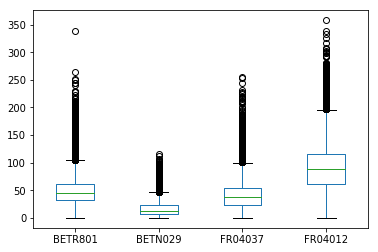

In [25]:
no2.plot(kind='box')

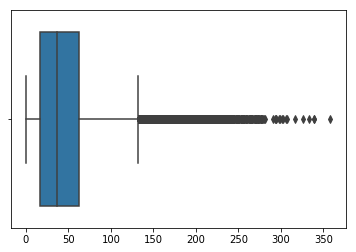

In [26]:
# boxplot can show outliers
sns.boxplot(no2, sym='k.')

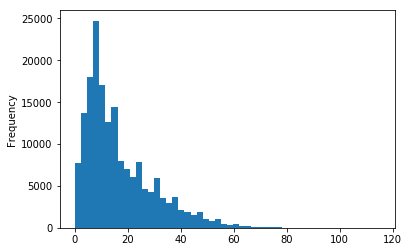

In [27]:
no2['BETN029'].plot(kind='hist', bins=50)

In [28]:
import seaborn

/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


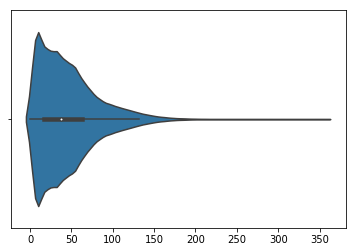

In [29]:
seaborn.violinplot(no2)

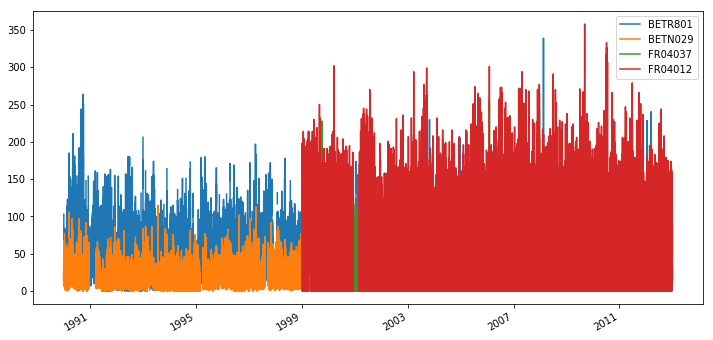

In [30]:
no2.plot(figsize=(12,6))
# I can display raw data as time series but it is questionable what it will tell us

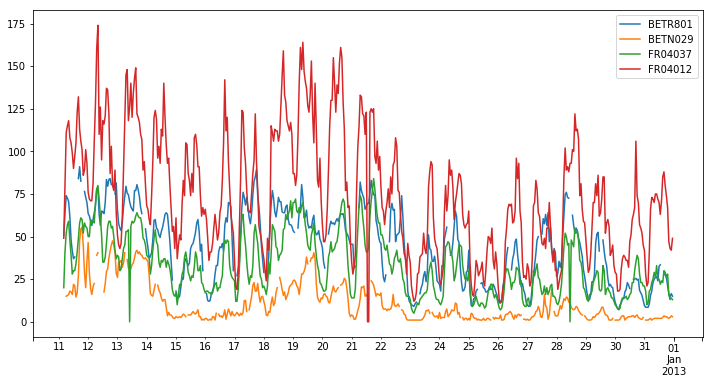

In [31]:
# we can select a small part of the data
no2[-500:].plot(figsize=(12,6))

Or I can use more interesting operations on time series

In [32]:
no2.index # as the index are time stamps, we can use them for interesting things

DatetimeIndex(['1990-01-01 00:00:00', '1990-01-01 01:00:00',
               '1990-01-01 02:00:00', '1990-01-01 03:00:00',
               '1990-01-01 04:00:00', '1990-01-01 05:00:00',
               '1990-01-01 06:00:00', '1990-01-01 07:00:00',
               '1990-01-01 08:00:00', '1990-01-01 09:00:00',
               ...
               '2012-12-31 14:00:00', '2012-12-31 15:00:00',
               '2012-12-31 16:00:00', '2012-12-31 17:00:00',
               '2012-12-31 18:00:00', '2012-12-31 19:00:00',
               '2012-12-31 20:00:00', '2012-12-31 21:00:00',
               '2012-12-31 22:00:00', '2012-12-31 23:00:00'],
              dtype='datetime64[ns]', length=198895, freq=None)

In [33]:
no2["2010-01-01 09:00": "2010-01-01 12:00"] # for example select a subset using interval defined by a string

,BETR801,BETN029,FR04037,FR04012
2010-01-01 09:00:00,17.0,7.0,19.0,41.0
2010-01-01 10:00:00,18.0,5.0,21.0,48.0
2010-01-01 11:00:00,17.0,4.0,23.0,63.0
2010-01-01 12:00:00,18.0,4.0,22.0,57.0


In [34]:
no2['2012'] # or select all measaurments from one speific year
# no2['2012'].head()
# no2['2012/03'] # or data from speific month

,BETR801,BETN029,FR04037,FR04012
2012-01-01 00:00:00,21.0,1.0,17.0,56.0
2012-01-01 01:00:00,18.0,1.0,16.0,50.0
2012-01-01 02:00:00,20.0,1.0,14.0,46.0
2012-01-01 03:00:00,16.0,1.0,17.0,47.0
2012-01-01 04:00:00,13.0,1.0,18.0,45.0
2012-01-01 05:00:00,17.0,1.0,15.0,36.0
2012-01-01 06:00:00,15.0,1.0,11.0,31.0
2012-01-01 07:00:00,13.0,1.0,12.0,30.0
2012-01-01 08:00:00,15.0,1.0,10.0,28.0
2012-01-01 09:00:00,15.0,1.0,12.0,42.0


In [35]:
# components of the date are accessible from index
# no2.index.hour
no2.index.year

Int64Index([1990, 1990, 1990, 1990, 1990, 1990, 1990, 1990, 1990, 1990,
            ...
            2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012],
           dtype='int64', length=198895)

In [36]:
# and what is interesting, we can change sampling frequency 
no2.resample('D').mean().head()

,BETR801,BETN029,FR04037,FR04012
1990-01-01,NaN,21.500000,NaN,NaN
1990-01-02,53.923077,35.000000,NaN,NaN
1990-01-03,63.000000,29.136364,NaN,NaN
1990-01-04,65.250000,42.681818,NaN,NaN
1990-01-05,63.846154,40.136364,NaN,NaN


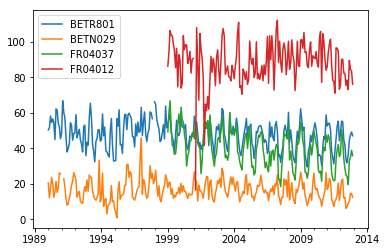

In [37]:
no2.resample('M').mean().plot()
# This seems to tell a little bit more. For example that there is probably some seasonality 

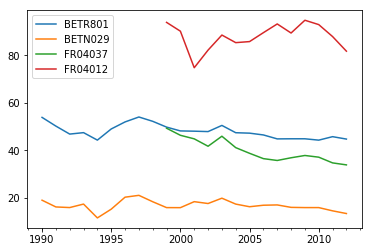

In [38]:
no2.resample('A').mean().plot()
# and probably even som long term trend

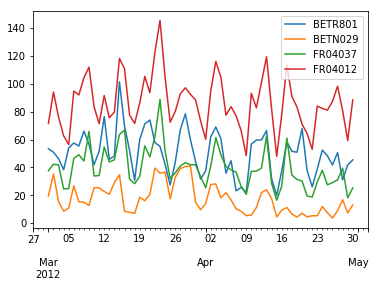

In [39]:
no2['2012-3':'2012-4'].resample('D').mean().plot()
# probably even some weekly seasonality

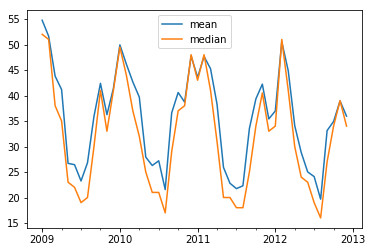

In [40]:
# I can use multiple aggregation finctons and compare them
no2.loc['2009':, 'FR04037'].resample('M').agg(['mean', 'median']).plot()
# no2.loc['2009':, 'FR04037'].resample('M').agg(['mean', 'std']).plot()

## Attention resample != groupby

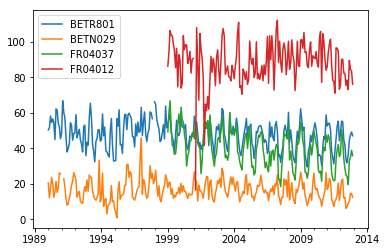

In [41]:
no2.resample('M').mean().plot()

This is a time series with monthly granularity. Values in one month are averaged

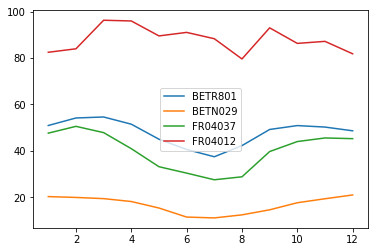

In [42]:
no2.groupby(no2.index.month).mean().plot()

These are values from the same month for every year averaged together. We got average course of the year with monthly granularity.

# Summary, what to take from this analysis

* Make sure, that your data are encoded correctly (often, you have to look into the data)
* Make sure, that data is in expected format (formatting of dates)
* Never edit data manually. Always use code, that you kan save and reuse every time you repeat the experiment. We want the analysis to be reproducible
* Make plots of everything possible to confirm that everything is as it should be